In [6]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
from scipy.linalg import expm, eig
from scipy.constants import hbar

# Time evolution of spin under fixed magnetic field

Define the spin operators

$\hat{S}_z = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ $\hat{S}_x = \frac{\hbar}{2} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ $\hat{S}_y = \frac{\hbar}{2} \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$

In [3]:
sZ = hbar/2 * np.array([[1,0],
                   [0,-1]])
sX = hbar/2 * np.array([[0,1],
                   [1,0]])
sY = hbar/2 * np.array([[0,-1j],
                   [1j,0]])

Define the Hamiltonian $\hat{H} = g \mu_B B \hat{S}_z = \omega_0 \hat{S}_z$

In [4]:
omega0 = 2 * np.pi

ham = omega0 * sZ
print(ham)

[[ 3.31303507e-34  0.00000000e+00]
 [ 0.00000000e+00 -3.31303507e-34]]


Extract eigenvalues and eigenvectors of Hamiltonian

In [7]:
eVal, eStates = eig(ham)
print(eVal, eStates)

[ 3.31303507e-34+0.j -3.31303507e-34+0.j] [[1. 0.]
 [0. 1.]]


Define an initial state $| \psi(t=0) \rangle = c_0 | E_0 \rangle + c_1 | E_1 \rangle = \begin{pmatrix} c_0 \\ c_1 \end{pmatrix}$

In [8]:
#psi0 = np.array([1,0])
psi0 = np.array([1,1])*1/np.sqrt(2)
print(psi0)

[0.70710678 0.70710678]


Evolve the state in time using $| \psi(t) \rangle = c_0 e^{-i E_0 t / \hbar} | E_0 \rangle + c_1 e^{-i E_1 t / \hbar} | E_1 \rangle$

In [11]:
time = np.linspace(0,0.95,96)
psiT = []

for t in time:
    psiT.append(psi0 * np.array([np.exp(- 1j * eVal[0] * t / hbar), np.exp(- 1j * eVal[1] * t / hbar)]))

Save the expectation values of x, y and z (e.g. $\langle \psi_t | \sigma_z | \psi_t \rangle$)

In [29]:
x = [(p.conj().T @ sX @ p).real / hbar for p in psiT]
y = [(p.conj().T @ sY @ p).real / hbar for p in psiT]
z = [(p.conj().T @ sZ @ p).real / hbar for p in psiT]

Plot the evolution of the state

In [37]:
def qubitPlots(time,x,y,z):
    bsPlot = qutip.Bloch()
    bsPlot.add_points([np.array(x)*2, np.array(y)*2, np.array(z)*2])
    bsPlot.render()
    bsPlot.fig.set_size_inches([25,5])

    ax1 = bsPlot.fig.add_subplot(133)
    ax1.plot(time,x,label="x")
    ax1.plot(time,y,label="y")
    ax1.plot(time,z,label="z")
    ax1.legend()
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Expectation value")

    return bsPlot

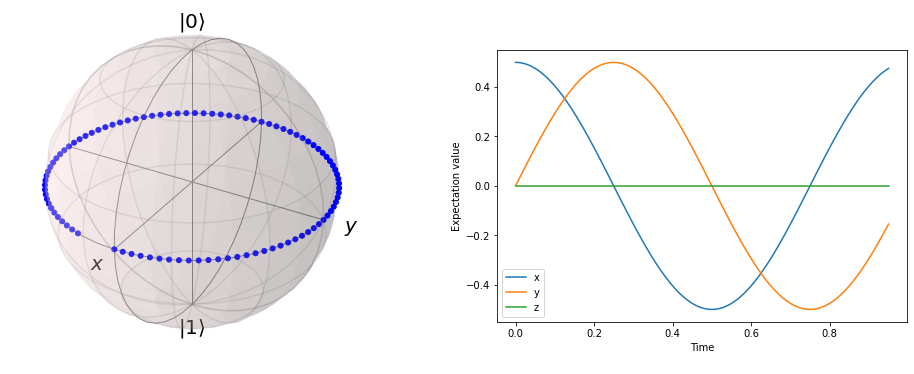

In [38]:
bsPlot = qubitPlots(time,x,y,z)
bsPlot.show()